In [1]:
%load_ext autoreload
%autoreload 2

import parenclitic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, SVG
import igraph

In [2]:
from configurations.load_data_down_GSE52588 import load_data_down_GSE52588
from configurations.config_down_GSE52588 import config

X, y, mask, all_features_names = load_data_down_GSE52588()

D:\PC\UNN\Science\Gerontology\data\GSE52588\GSE52588_average_beta.txt
Data loaded:  1.1755040999999995
float32 (14756, 87)
(87, 14756) 14756


In [2]:
from configurations.load_data_random import load_data_random
from configurations.config_random_data import config

X, y, mask, all_features_names = load_data_random()

Data loaded:  0.13666800000000023
float32 (14756, 58)
(58, 14756) 14756


In [4]:
parenclitic.IG_filter()

In [2]:
from configurations.load_data_random_like_GSE52588 import load_data_random_like_GSE52588
from configurations.config_random_data_like_GSE52588 import config

X, y, mask, all_features_names = load_data_random_like_GSE52588()

\\Mystery\d\PC\UNN\Science\Gerontology\data\GSE52588\GSE52588_average_beta.txt
Data loaded:  1.145714
float32 (14756, 87)
(87, 14756) 14756
Data loaded:  1.564335999999999
float32 (14756, 87)
(87, 14756) 14756


In [8]:
from configurations.load_data_down_GSE52588 import load_data_down_GSE52588_cpgs
from configurations.config_down_GSE52588_cpg import config

X, y, mask, all_features_names = load_data_down_GSE52588_cpgs()

Data loaded:  37.55864120000115
float32 (422801, 87)
(87, 422801)
(87, 422801) 150254 (87,) (422801,)


In [10]:
from configurations.config_down_GSE52588_cpg import config
config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"])

"D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_cpgs_150254\\geotypes_['Island']\\kde_mask_siblings_mask\\algorithm_pdf\\thr_type_best\\division_rule_non_control\\graphs\\graph_id_sample_0.tsv"

In [3]:
y, mask

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=int8),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2], dtype=int8))

In [4]:
from annotations.cpgs import cpgs_annotation
cpgs = cpgs_annotation(config.ifname('cpgs_annotations'))
#cur = cpgs.get_sub_frame({'chr_in': ['22'], 'geotype_ex': ['Island']})
#df = cpgs.get_cpgs({'chr_in': ['22'], 'geotype_ex': ['Island']})
cpgs_names, _ = cpgs.get_cpgs({'gene_out': ['PFN3', 'LOXL2', 'HOXA2', 'MIR219-2', 'DLL1']})
cpgs_ids = np.array([y for x in cpgs_names for y in np.flatnonzero(all_features_names == x).tolist()])

KeyError: 'cpgs_annotations'

In [5]:
Xq = X[:, cpgs_ids]
sub_subjects = config.params["mongoloids_mask"].value
Xc = Xc[sub_subjects, :]
Yc = y[sub_subjects]
features_names = all_features_names[cpgs_ids]

NameError: name 'cpgs_ids' is not defined

In [ ]:
num_samples = Xc.shape[0]
num_features = Xc.shape[1]

mask = np.array(Yc, np.bool)
mask[:] = 1

clf = parenclitic.parenclitic(kernel = parenclitic.pdf_kernel(thr_p = 0.9))
clf.fit(Xc, Yc, mask)
clf.calc_parenclitic()
gr = clf.get_graphs(features_names = features_names)

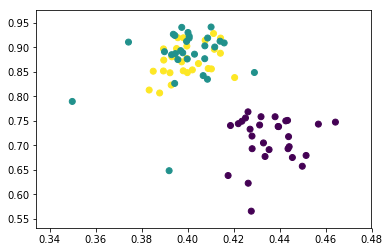

In [150]:
plt.scatter(X[:, 297], X[:, 1712], c = mask)

In [35]:
print(np.flatnonzero(all_features_names == 'MAP3K6'))
print(np.flatnonzero(all_features_names == 'GPR75'))
#GPR75

[297]
[1712]


In [8]:
kernel = parenclitic.pdf_kernel(thr_p = 0.88)
kernel = kernel.fit(X[:, 297], X[:, 1712], y, mask)

In [6]:
kernel = parenclitic.pdf_kernel(thr_p = 0.88)
kernel = kernel.fit(X[:, 297], X[:, 1712], y, mask)
p = kernel.p
p_log = kernel.p
p_log = np.maximum(p_log, (p_log[p_log > 0]).min())
p_log = np.log(p_log).astype('float32')
p_log[mask == 0] -= 150
mask2 = np.zeros((87,), dtype = 'bool')
mask2[:29] = True
mask2[-29:] = True

In [376]:
#import time
from sklearn.tree import DecisionTreeClassifier
#be = time.time()
def do_thing(p_log, mask, y):
    
    p_log = p_log[mask]#.reshape(1, -1)
    y = (y[mask] == 0)
    
    '''ids = np.argsort(p_log)
    p_log = p_log[ids]
    y = y[ids]'''
    
    clf = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy').fit(p_log.reshape(-1, 1).astype('float32'), y.reshape(-1, 1))
    tree_thr = clf.tree_.threshold[0]
    impurity = clf.tree_.impurity[0]
    print(clf.tree_.impurity)
    return tree_thr, impurity
import timeit
#print(timeit.timeit('do_thing(p_log, mask, y)', setup="from __main__ import do_thing, p_log, mask, y", number=100000))
print(tree_thr, impurity)

-205.84896087646484 1.584962500721156


In [389]:
from scipy.special import xlogy
def gini(a, b, n):
    p0 = a / n
    p1 = b / n
    return -xlogy(p0, p0) - xlogy(p1, p1)
    #return -p0 * np.log(p0 + 1e-9) - p1 * np.log(p1 + 1e-9)

def do_thing_fast(p_log, mask, y):
    p_log = p_log[mask]
    y = (y[mask] == 0)
    
    ids = np.argsort(p_log)
    p_log = p_log[ids]
    y = y[ids]
    n = len(y)
    
    n11 = np.cumsum(y == 0)
    n21 = np.cumsum(y == 1)
    n1 = n11[-1]
    n2 = n21[-1]
    n11 = n11[:-1]
    n21 = n21[:-1]
    n12 = n1 - n11
    n22 = n2 - n21
    
    impurity = gini(n1, n2, n) - (gini(n11, n21, n11 + n21) * (n11 + n21) / n + 
                                  gini(n12, n22, n12 + n22) * (n12 + n22) / n)
    
    id_imp = np.argmax(impurity)
    thr = (p_log[id_imp] + p_log[id_imp + 1]) / 2
    imp = impurity[id_imp] / (2 * np.log(2))
    acc = ((p_log < thr) == y).mean()
    acc = max(1 - acc, acc)
    return thr, imp, acc

def do_thing_fast_2(p_log, mask, y):
    p_log = p_log[mask]#.reshape(1, -1)
    y = (y[mask] == 0)#.reshape(1, -1)
    
    ids = np.argsort(p_log)
    p_log = p_log[ids]
    y = y[ids]
    n = np.array(len(y), dtype = 'float32')
    
    n11 = np.cumsum(y == 0).astype('float32')
    n21 = np.cumsum(y == 1).astype('float32')
    n1 = n11[-1]
    n2 = n21[-1]
    n11 = n11[:-1]
    n21 = n21[:-1]
    n12 = n1 - n11
    n22 = n2 - n21
    
    #impurity = gini(n1, n2, n) - (gini(n11, n21, n11 + n21) * (n11 + n21) / n + gini(n12, n22, n12 + n22) * (n12 + n22) / n)
    
    #impurity = -xlogy(n1 / n, n1 / n) - xlogy(n2 / n, n2 / n) - ((-xlogy(n11, n11 / (n11 + n21)) - xlogy(n21, n21 / (n11 + n21))) + (-xlogy(n12, n12 / (n12 + n22)) - xlogy(n22, n22 / (n12 + n22)))) / n
    #impurity = -xlogy(n1 / n, n1 / n) - xlogy(n2 / n, n2 / n) + \
    #           (xlogy(n11, n11 / (n11 + n21)) + xlogy(n21, n21 / (n11 + n21)) + \
    #            xlogy(n12, n12 / (n12 + n22)) + xlogy(n22, n22 / (n12 + n22))) / n
    m1 = (n11 + n21)
    m2 = (n12 + n22)
    impurity = -xlogy(n1 / n, n1 / n) - xlogy(n2 / n, n2 / n) + \
               (xlogy(n11, n11 / m1) + xlogy(n21, n21 / m1) + \
                xlogy(n12, n12 / m2) + xlogy(n22, n22 / m2)) / n
    #plt.plot(range(len(impurity)), impurity)
    
    id_imp = np.argmax(impurity)
    return (p_log[id_imp] + p_log[id_imp + 1]) / 2, impurity[id_imp]# / (2 * np.log(2))

do_thing_fast(p_log, mask2, y)

(-205.84896850585938, 0.30057170922373017, 0.896551724137931)

In [396]:
(y == 0)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [375]:
clf = DecisionTreeClassifier(max_depth = 1, criterion = 'entropy').fit(p_log.reshape(-1, 1).astype('float32'), y.reshape(-1, 1))
tree_thr = clf.tree_.threshold[0]
impurity = clf.tree_.impurity[0]
print(clf.tree_.impurity, impurity)
    
dir(clf.tree_)


[1.5849625  1.         1.16484472] 1.584962500721156


['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'apply',
 'capacity',
 'children_left',
 'children_right',
 'compute_feature_importances',
 'decision_path',
 'feature',
 'impurity',
 'max_depth',
 'max_n_classes',
 'n_classes',
 'n_features',
 'n_node_samples',
 'n_outputs',
 'node_count',
 'predict',
 'threshold',
 'value',
 'weighted_n_node_samples']

In [392]:
thr1, imp1 = do_thing(p_log, mask2, y)
thr2, imp2, acc2 = do_thing_fast(p, mask2, y)
thr2, imp2 = do_thing_fast_2(p, mask2, y)

[1.         0.         0.66096234 0.91829583 0.28639696]


In [393]:
print(acc2)

1.0


In [388]:
print(timeit.timeit('do_thing_fast(p_log, mask2, y)', setup="from __main__ import do_thing_fast, p_log, mask2, y", number=100000))
#print(timeit.timeit('do_thing_fast_2(p_log, mask2, y)', setup="from __main__ import do_thing_fast_2, p_log, mask2, y", number=100000))
#print(timeit.timeit('do_thing(p_log, mask2, y)', setup="from __main__ import do_thing, p_log, mask2, y", number=100000))


5.529479899996659


In [358]:
print(imp1, imp2)

1.0 0.41668087


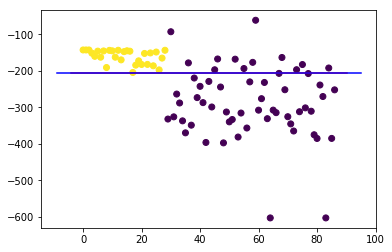

In [352]:
plt.scatter(range(len(p_log)), p_log, c = y == 0)
plt.plot(plt.xlim(), [thr1, thr1], 'r')
plt.plot(plt.xlim(), [thr2, thr2], 'b')
#plt.ylim([-120, -50])

4 5 4 58 42 0 4 0 0 2 1 1 2 0 42 0 1 0 4 1 3 2 2 51 19 82 37 37 2 

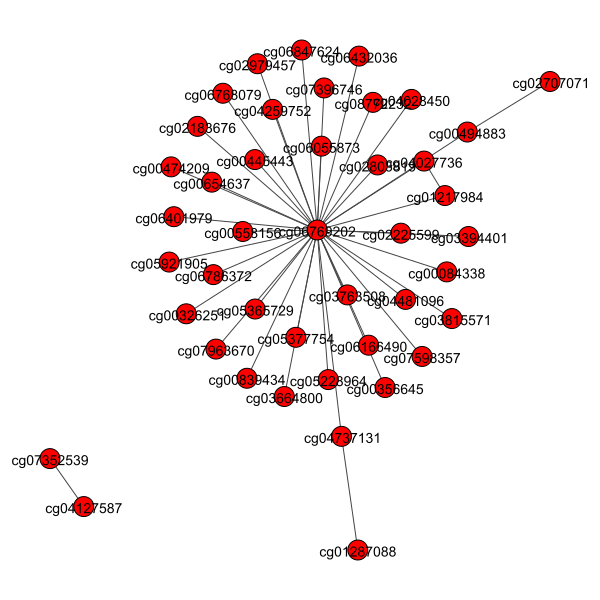

In [10]:
for g in gr:
    print(g.ecount(), end=' ')
visual_style = {}
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 50
gc = gr[4].copy()
gc.delete_vertices([v.index for v in gc.vs if v.degree() == 0])
gc.vs["label"] = features_names
visual_style["label"] = gc.vs["label"]
p = igraph.plot(gc, **visual_style)
display(SVG(p._repr_svg_()))

In [138]:
grs = gr.copy()
#grd = gr.copy()
    

In [141]:
pard = clf.get_parenclitic()
print (type(par))
print (par.shape)
print (parenclitic.parenclitic.metric_names())
print (par.head())

<class 'pandas.core.frame.DataFrame'>
(29, 40)
{'degrees': 'Degrees', 'min_degrees': 'Min degrees', 'max_degrees': 'Max degrees', 'mean_degrees': 'Mean degrees', 'std_degrees': 'Std degrees', 'efficiency': 'Efficiency', 'betweenness': 'Betweenness', 'min_betweenness': 'Min betweenness', 'max_betweenness': 'Max betweenness', 'mean_betweenness': 'Mean betweenness', 'std_betweenness': 'Std betweenness', 'closeness': 'Closeness', 'min_closeness': 'Min closeness', 'max_closeness': 'Max closeness', 'mean_closeness': 'Mean closeness', 'std_closeness': 'Std closeness', 'pagerank': 'Pagerank', 'min_pagerank': 'Min pagerank', 'max_pagerank': 'Max pagerank', 'mean_pagerank': 'Mean pagerank', 'std_pagerank': 'Std pagerank', 'eigenvalues': 'Eigenvalues', 'min_eigenvector_centrality': 'Min eigenvector centrality', 'max_eigenvector_centrality': 'Max eigenvector centrality', 'mean_eigenvector_centrality': 'Mean eigenvector centrality', 'std_eigenvector_centrality': 'Std eigenvector centrality', 'num_e

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
par_numeric = par.select_dtypes(include=numerics)
print (par_numeric.head())

   efficiency   max_IPR  max_betweenness  max_closeness  max_degrees  \
0   12.785207  0.704458            177.0       3.332507    42.018580   
1    0.000000  1.000000              0.0       0.033333     0.000000   
2    3.668922  0.500000             33.0       0.060284     3.189633   
3    6.396413  0.650000            102.0       4.238327    31.636519   
4    1.450383  0.500000             27.0       0.053510     3.049204   

   max_eigenvector_centrality  max_pagerank  max_weights  mean_IPR  \
0                         1.0      0.039119     2.573403  0.321016   
1                         1.0      0.033333          NaN  1.000000   
2                         1.0      0.110202     0.474736  0.278776   
3                         1.0      0.039142     1.638885  0.300922   
4                         1.0      0.169275     0.574375  0.299838   

   mean_betweenness  ...  min_weights  num_edges  robustness  std_betweenness  \
0         21.933333  ...     0.000443        364          19     

In [143]:
import pandas as pd
pars["subject"] = "Siblings"
pard["subject"] = "DS"
par = pd.concat([pars, pard])

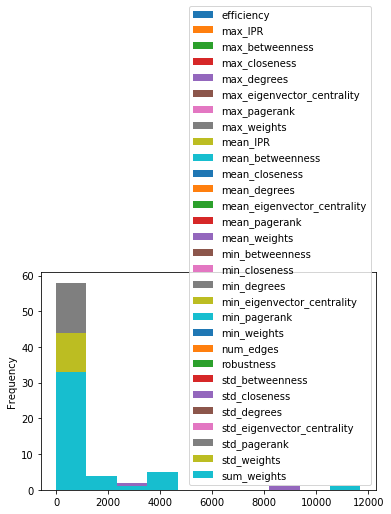

In [146]:
par.plot.hist()

# Subset gene pairs for parenclitic

In [13]:
from graphs_aux import *
data = np.load(config.ifname('good_pairs'))
IDS = data['IDS']
print(IDS.shape, IDS[:10])

(1355916, 2) [[12195  2526]
 [12195  9708]
 [12195  7809]
 [12195 14282]
 [12195  8888]
 [12195  8235]
 [12195  4687]
 [12195   920]
 [12195  9833]
 [12195 10817]]


In [87]:
partition = parenclitic.graph_partition_subset(id_part = 0, num_parts = 1)
partition.fit(IDS[:10])

In [12]:
for i, pair in enumerate(partition):
    print(i, pair)
    

0 (0, 183)
1 (0, 584)
2 (0, 650)
3 (0, 676)
4 (0, 1069)
5 (0, 1098)
6 (0, 1360)
7 (0, 2013)
8 (0, 2173)
9 (0, 2425)


In [8]:
mask

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

In [5]:
config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"])

'D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_genes_14756\\kde_mask_siblings_mask\\algorithm_pdf\\thr_type_best\\division_rule_non_control\\graphs\\graph_id_sample_0.tsv'

In [5]:
import parenclitic

In [1]:
# Temporary 
%load_ext autoreload
%autoreload 2

import parenclitic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, SVG
import igraph
from configurations.load_data_down_GSE52588 import load_data_down_GSE52588
from configurations.config_down_GSE52588 import config

X, y, mask, all_features_names = load_data_down_GSE52588()

D:\PC\UNN\Science\Gerontology\data\GSE52588\GSE52588_average_beta.txt
Data loaded:  1.1576121000000001
float32 (14756, 87)
(87, 14756) 14756


In [2]:
import multiprocessing as mp
import multiprocessing, logging
#mpl = multiprocessing.log_to_stderr()
#mpl.setLevel(logging.DEBUG)

if __name__ == "__main__":
    import time
    num_samples = X.shape[0]
    num_features = X.shape[1]

    #mask = np.array(y, np.bool)
    #mask[:] = 1
    
    #by_group = config.params["by_group"].value
    min_score = config.params["min_score"].value
    thr_type = config.params["thr_type"].value
    division_rule = config.params["division_rule"].value
    kernel = parenclitic.pdf_kernel(thr_type = thr_type, min_score = min_score, division_rule = division_rule)
    pair_filter = parenclitic.IG_filter()
    clf = parenclitic.parenclitic(kernel = kernel, pair_filter = pair_filter, verbose = 0)
    # partition = parenclitic.graph_partition_subset()
    #clf = parenclitic.parenclitic(kernel = parenclitic.classifier_kernel(min_score = min_score, by_group = by_group)) # partition = parenclitic.graph_partition_subset()
    #clf = parenclitic.parenclitic(kernel = parenclitic.pdf_kernel(thr_p = 0.88))#, partition = parenclitic.graph_partition_subset())
    be = time.time()
    #clf.fit(X, y, mask, num_workers = 5)
    clf.fit(X[:, :], y[:], mask[:], num_workers = 6)
    en = time.time()
    print(en - be)
    #clf.calc_parenclitic()
    #gr = clf.get_graphs(features_names = features_names)
    sdf
    paths = []
    for id_sample in config.params["id_sample"]:
        paths.append(config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"]))
    clf.set_graph_paths(paths = paths[:])
    clf.save_graphs(gtype = 'csv')
    
    paths = []
    for id_sample in config.params["id_sample"]:
        paths.append(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
    clf.set_graph_paths(paths = paths[:])
    clf.save_graphs(gtype = 'npz')

Number of edges: 46:   2%|▋                                            | 1669856/108862390 [04:43<5:02:50, 5899.30it/s]


KeyboardInterrupt: 

In [3]:
import os
os.getcwd()
work_dir = '../logs'
open(work_dir + '/' + str(os.getpid()) + "_error.out", "a")

<_io.TextIOWrapper name='../logs/9440_error.out' mode='a' encoding='cp1251'>

In [5]:
Out[3].close()

In [10]:
pair_filter = parenclitic.IG_filter()
pair_filter.fit(X, mask)
print(len(pair_filter))
print(pair_filter.num_good)

75995956
12329


In [11]:
print(pair_filter.score[59])
print(mask)

[0.8965517]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2]


In [5]:
gs = clf.get_graphs()

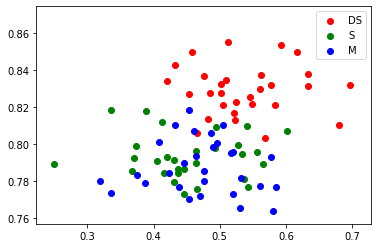

In [4]:
id1 = 0
id2 = 59
plt.scatter(X[:29, id1], X[:29, id2], c = 'r')
plt.scatter(X[29:29*2, id1], X[29:29*2, id2], c = 'g')
plt.scatter(X[29*2:29*3, id1], X[29*2:29*3, id2], c = 'b')

plt.legend(['DS', 'S', 'M'])

In [17]:
(14576 - pair_filter.num_good)# * 14576

151

In [18]:
paths = []
for id_sample in config.params["id_sample"]:
    paths.append(config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"]))
clf.set_graph_paths(paths = paths[:])
clf.save_graphs(gtype = 'csv')

paths = []
for id_sample in config.params["id_sample"]:
    paths.append(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
clf.set_graph_paths(paths = paths[:])
clf.save_graphs(gtype = 'npz')

In [ ]:
by_group = config.params["by_group"].value
min_score = config.params["min_score"].value
by_group

In [9]:
paths = []
for id_sample in config.params["id_sample"]:
    paths.append(config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"]))
clf.set_graph_paths(paths = paths[:87])
clf.save_graphs(gtype = 'csv')

paths = []
for id_sample in config.params["id_sample"]:
    paths.append(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
clf.set_graph_paths(paths = paths[:87])
clf.save_graphs(gtype = 'npz')

In [3]:
config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"])

'Z:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\params\\num_genes_14756\\kde_mask_siblings_mask\\algorithm_svc\\by_group_True\\graphs\\graph_id_sample_0.tsv'

In [8]:
mask[:29].shape, mask.shape, 

((29,), (87,))

In [26]:
gr = clf.get_graphs()
print([g.ecount() for g in gr])

[2, 2, 4, 0, 1, 0, 1, 2, 30, 0, 1, 0, 8, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 5, 0, 0, 0, 0, 0]


In [14]:
    paths = []
    for id_sample in config.params["id_sample"]:
        paths.append(config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"]))
    clf.set_graph_paths(paths = paths)
    clf.save_graphs(gtype = 'csv')
    
    paths = []
    for id_sample in config.params["id_sample"]:
        paths.append(config.ofname(["graphs", "g"], ext = ".npz", include_set = config.params_sets["graph"]))
    clf.set_graph_paths(paths = paths)
    clf.save_graphs(gtype = 'npz')

In [4]:
paths = []
for id_sample in config.params["id_sample"]:
    print(config.ofname(["graphs", "g"], ext = ".tsv", include_set = config.params_sets["graph"]))
    break

D:\PC\UNN\Science\Gerontology\data\GSE52588\params\num_genes_14756\kde_mask_mongoloids_mask\algorithm_kde\thr_p_0.1\graphs\graph_id_sample_0.tsv


In [ ]:
clf.save_graph()

In [33]:
from annotations.cpgs import cpgs_annotation
cpgs = cpgs_annotation(config.ifname('cpgs_annotations'))

In [66]:
bad_cpgs = np.loadtxt(config.ifname('bad_cpgs'), dtype='str')
crit = {'gene_out': [np.NaN], 'cpgs_in': all_features_names, 'cpgs_out': bad_cpgs, 'geotype_out': [np.NaN], 'chr_out': ['X', 'Y']}
genes = cpgs.get_crit_col_values('gene', crit)
print(len(genes))

['RBL2', 'ACTN1', 'ATP2A1', 'SFRP1', 'NIPA2', 'MAN1B1', 'TSEN34', 'LRRC16A', 'CNBP', 'DDX55']
15072


In [70]:
df = cpgs.get_sub_frame(crit)

In [71]:
print(df2)

In [73]:
gene_sum = defaultdict([0, 0])
for id_cpg, row in df.iterrows():
    print(id_cpg, row['UCSC_REFGENE_NAME'], row['ID_REF'])
    for x in list(row['UCSC_REFGENE_NAME']):
        gene_sum[x] += row['']

0 RBL2 cg00000029
5 ACTN1 cg00000289
6 ATP2A1 cg00000292
7 SFRP1 cg00000321
9 NIPA2 cg00000622
10 MAN1B1 cg00000658
11 TSEN34 cg00000714
12 LRRC16A cg00000721
13 CNBP cg00000734
14 DDX55 cg00000769
15 KLHL29 cg00000807
16 TLR2 cg00000884
18 {'KCNQ1', 'KCNQ1OT1'} cg00000924
20 NPHP4 cg00000957
21 PSKH2 cg00001099
22 MRPS25 cg00001245
26 MAEL cg00001349
28 ELOVL1 cg00001446
31 {'ZMIZ1', 'LOC283050'} cg00001582
32 NR5A2 cg00001583
34 ROCK2 cg00001594
35 CDK10 cg00001687
40 DNAJA2 cg00001854
41 ATOH7 cg00001874
43 PINK1 cg00002028
44 LRFN1 cg00002033
45 RWDD2B cg00002080
46 MRPL12 cg00002116
50 RTTN cg00002236
51 CD2BP2 cg00002406
52 SLMAP cg00002426
54 NOV cg00002464
56 MXD4 cg00002490
59 TAS1R3 cg00002593
60 ITGAD cg00002597
62 SMARCC2 cg00002660
63 C1orf114 cg00002719
66 C1orf65 cg00002808
68 DAB1 cg00002810
71 BDH1 cg00003014
72 SLBP cg00003091
73 {'TMEM43', 'CHCHD4'} cg00003173
76 RFX5 cg00003202
78 LHX5 cg00003298
81 CASZ1 cg00003513
86 {'CCDC45', 'DDX5'} cg00003784
88 RNF220 cg00003

KeyboardInterrupt: 

In [54]:
from tqdm import tqdm
cur_crit = crit
Xg = np.zeros((X.shape[0], len(genes)))
for i, gene in tqdm(enumerate(genes), ncols = 100):
    cur_crit['gene_in'] = gene
    cpgs_names, ids = cpgs.get_cpgs(cur_crit)
    cpgs_names, ids, ids2 = np.intersect1d(all_features_names, cpgs_names, return_indices = True)
    cur = np.mean(X[:, ids], axis = 1)
    Xg[:, i] = cur
    #print(cur.shape)
    #break

4it [00:15,  3.95s/it]

KeyboardInterrupt: 

In [ ]:
df.group

In [43]:
len(genes)
    

15072

In [ ]:

#cur = cpgs.get_sub_frame({'chr_in': ['22'], 'geotype_ex': ['Island']})
#df = cpgs.get_cpgs({'chr_in': ['22'], 'geotype_ex': ['Island']})
cpgs_names, _ = cpgs.get_cpgs({'gene_out': [np.NaN]})
cpgs_ids = np.array([y for x in cpgs_names for y in np.flatnonzero(all_features_names == x).tolist()])

In [16]:
len(all_features_names)

14756

In [21]:
genes_names = np.loadtxt('D:\\PC\\UNN\\Science\\Gerontology\\data\\GSE52588\\genes_names.txt', dtype = 'str')

In [22]:
len(genes_names)

15024

In [23]:
genes_names

array(['SOX9', 'L3MBTL', 'KHSRP', ..., 'TMED3', 'C6orf114', 'CDK5R2'],
      dtype='<U18')

In [42]:
new_names, ids1, ids2 = np.intersect1d(all_features_names, genes_names, return_indices = True, assume_unique = True)

In [43]:
all_features_names[ids1[0]], genes_names[ids2[0]]
ids1[0], ids2[0]

(13747, 6785)

In [55]:
from tqdm import tqdm
to_gene_ids = [np.nonzero(all_features_names == genes_names[i])[0].item(0) \
               for i in tqdm(range(len(genes_names)), ncols = 100)]

  0%|                                                                     | 0/15024 [00:00<?, ?it/s]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [64]:
to_gene_ids = np.ones(len(genes_names), dtype = np.int32) * -1
for i in tqdm(range(len(genes_names)), ncols = 100):
    cur = np.nonzero(all_features_names == genes_names[i])[0]
    if len(cur) > 0:
        to_gene_ids[i] = cur.item(0)


100%|███████████████████████████████████████████████████████| 15024/15024 [00:01<00:00, 9124.70it/s]

In [60]:
to_gene_ids.shape

(15024,)

In [65]:
IDS2 = np.array(IDS)
for i in range(len(IDS)):
    u = to_gene_ids[IDS[i, 0]]
    v = to_gene_ids[IDS[i, 1]]
    IDS2[i, 0] = u
    IDS2[i, 1] = v

In [79]:
mask_ids = (IDS2[:, 0] == -1) | (IDS2[:, 1] == -1)

In [82]:
IDS3 = IDS2[~mask_ids, :]

In [85]:
IDS2.shape, mask.shape, IDS3.shape

((1468146, 2), (87,), (1355916, 2))

In [84]:
np.savez(config.ifname("good_pairs"), IDS = IDS3)

In [10]:
X.shape[1] * (X.shape[1] - 1) // 2 / len(IDS) * 853 / 3600

19.023551989536553

In [7]:
len(IDS)

1355916

In [17]:
import multiprocessing as mp
import multiprocessing, logging
mpl = multiprocessing.log_to_stderr()
mpl.setLevel(logging.DEBUG)
from tmp import *

if __name__ == "__main__":
    main(X, y, mask)

[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2824
[DEBUG/MainProcess] created semlock with handle 2752
[DEBUG/MainProcess] created semlock with handle 2752
[DEBUG/MainProcess] created semlock with handle 2752
[DEBUG/MainProcess] created semlock with handle 2752
[DEBUG/MainProcess] created semlock with handl

1


[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] terminating pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainProcess] finalizing pool
[DEBUG/MainPro

[DEBUG/MainProcess] joining worker handler
[DEBUG/MainProcess] ensuring that outqueue is not full
[DEBUG/MainProcess] joining worker handler
[DEBUG/MainProcess] ensuring that outqueue is not full
[DEBUG/MainProcess] joining worker handler
[DEBUG/MainProcess] ensuring that outqueue is not full
[DEBUG/MainProcess] terminating workers
[DEBUG/MainProcess] ensuring that outqueue is not full
[DEBUG/MainProcess] terminating workers
[DEBUG/MainProcess] result handler exiting: len(cache)=0, thread._state=2[DEBUG/MainProcess] terminating workers

[DEBUG/MainProcess] terminating workers
[DEBUG/MainProcess] result handler exiting: len(cache)=0, thread._state=2
[DEBUG/MainProcess] terminating workers
[DEBUG/MainProcess] result handler exiting: len(cache)=0, thread._state=2
[DEBUG/MainProcess] terminating workers
[DEBUG/MainProcess] result handler exiting: len(cache)=0, thread._state=2
[DEBUG/MainProcess] terminating workers
[DEBUG/MainProcess] result handler exiting: len(cache)=0, thread._state=2
[

[(array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]]), array([-0.10045865,  0.38741675,  0.17679457,  0.16707687, -0.01740339,
        0.09363793,  0.6370762 ,  0.31548882,  0.21391252,  0.03413122,
        0.06766567,  0.22052224,  0.43958214,  0.5861962 ,  0.03449933,
       -0.04434159,  0.4420338 ,  0.05798579, -0.11634251, -0.18283941,
        0.23762888

In [ ]:
#import Pool
from multiprocessing import Pool
#Define a worker — a function which will be executed in parallel
def worker(x):
    return x*x
#Assuming you want to use 3 processors
num_processors = 3
#Create a pool of processors
p=Pool(processes = num_processors)
#get them to work in parallel
output = p.map(worker,[i for i in range(0,3)])
print(output)

parenclitic.classes.classifier_kernel

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 503, 421, 403, 501, 756, 547, 646, 605, 541, 672, 654, 539, 484, 619, 398, 410, 460, 528, 576, 694, 638, 485, 571, 578, 734, 576, 612, 397, 646, 514, 526, 542, 730, 739, 751, 801, 672, 703, 813, 747, 700, 716, 494, 706, 560, 451, 552, 661, 712, 814, 786, 699, 646, 666, 673, 727, 566, 679]


In [9]:
from transform_data import * 

In [13]:
make_genes_edge(X[:, 0], X[:, 1], X[:, 0], X[:, 1], [0.8])

[6.44163452e-03 5.85362531e-02 1.55135318e-01 ... 5.82742013e+05
 5.82867412e+05 1.00000000e+00]


array([[ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
         True, False,  True,  True,  True,  True, False, False,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True, False, False, False,  True, False, False,
        False, False, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True]])

In [ ]:
data = np.random.normal(size = 1000)
kde = stats.gaussian_kde(data)

In [97]:
num_points = 1000000
points = kde.resample(num_points)
pr = np.array(kde(points))
pr.sort()
thr_p = 0.2
print(pr.shape)
p = 0.2
pos = np.searchsorted(pr, p)
w = float(num_points - pos) / num_points
print(w, abs(w - wl))

(1000000,)
0.747832 0.0013896868650297156


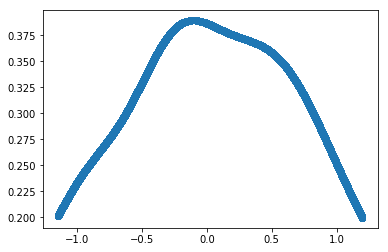

In [98]:
x = np.linspace(-1.15, 1.2, 10000000)
plt.plot(x, kde(x), 'o')
wl = ((x[1] - x[0]) * kde(x)).sum()

In [99]:
print(w, abs(w - wl))

0.747832 0.0013943507527764964


In [45]:
((x[1] - x[0]) * kde(x)).sum()

0.9999999420213942

In [8]:
while True:
    

KeyboardInterrupt: 